In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

from sklearn.manifold import TSNE


In [7]:
data = pd.read_csv('../data/data.csv')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

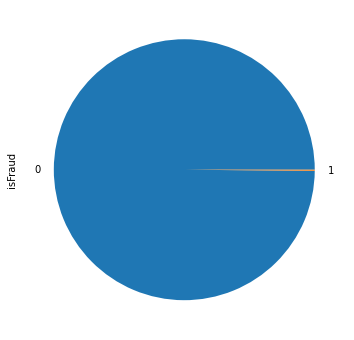

In [12]:
plt.figure(figsize=(9, 6))
data['isFraud'].value_counts().plot.pie()
plt.show()

In [8]:
(data['isFraud'] == 1).sum()

8213

In [9]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

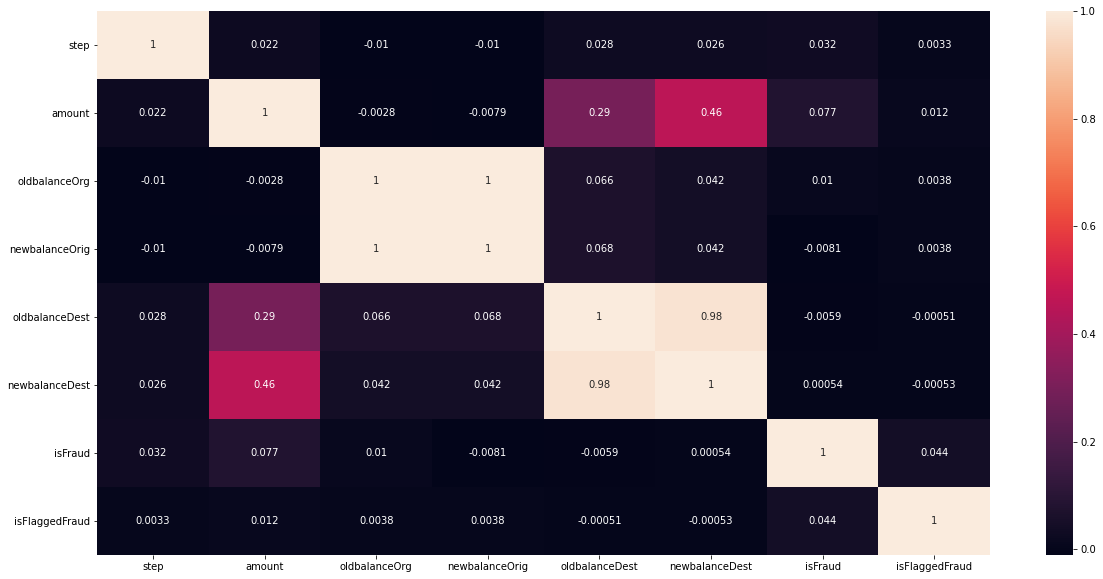

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#### Modeling with Num features


In [16]:
features = data.drop(columns=['type', 'nameOrig', 'nameDest','isFraud']).values
target = data['isFraud'].values


In [17]:
features.shape, target.shape

((6362620, 7), (6362620,))

In [18]:
### Standarization ###
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Train Test Split ###
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size = 0.2)

### Model ###
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

### Prediction ###
y_pred = rf_classifier.predict(X_test)


((5090096, 7), (5090096,), (5090096, 7), (5090096,))

In [22]:
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Classification report: ', classification_report(y_pred, y_test))

Accuracy:  0.9999316319377867
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270994
           1       0.95      0.99      0.97      1530

    accuracy                           1.00   1272524
   macro avg       0.98      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524



In [25]:
tsne = TSNE(2)

In [26]:
# TSNE
tsne = TSNE(2)

# Smaller dataset :
n_points = 20000
data_ = features[:n_points]
labels = target[:n_points]

In [27]:
tsne_data = tsne.fit_transform(data_)

In [83]:
def display_mnist(reduced, labels):
  fig = plt.figure(figsize=(10,30), dpi=60)
  ax = fig.add_subplot(111, projection='3d')

  these_points = reduced
  ax.scatter(these_points[:, 0], these_points[:, 1], c=labels)
  plt.legend(bbox_to_anchor=(1, 1), loc=2)
  ax.set_title("Data distribution")
  plt.show()

No handles with labels found to put in legend.


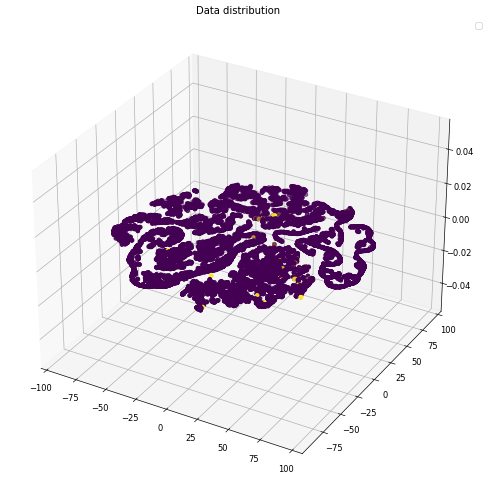

In [82]:
display_mnist(tsne_data, labels)